# Save Wally!

This project aims at identifying small objects from a large image knowing their coordinates
There are 5 classes of objects (seals)
First of all the dataset is an image of c. 30 billion pixels. We used the gdal script
gdal2tile.py
The images are organised in path and naming convention that relates to their position in the pyramidal image.
This created a pyramidal image with 9 layers.
Each tile is 256x256 pixels
Each pixel in the uppermost layer of the pyramid forms a tile in the lowermost level

In [2]:
import numpy as np
import os
from skimage import data, color, feature
from PIL import Image
maxX = 46883
maxY = 63512
SizeTile = 256
R = 20 #radius
# coordinate vector full resolution
Xo = np.arange(maxX)
Yo = np.arange(maxY)
# LL coordinate of tiles
Xto = Xo[::SizeTile]
Yto = Yo[::SizeTile]
Dir = '/home/julien/Desktop/NewData/StitchMICE_ORKlh16_3_1104_CP_FINAL/'

def LocateTile (X,Y,SizeTile):
    '''Locate the tile index from the pixel coordinate'''
    return X//SizeTile, Y//SizeTile

def axisTile (Coord, depth):
    '''Locate pixel coordinate from coordinate vector at given depth'''
    return Coord[::2*depth]

def find_nearest(array, value):
    return (np.abs(array - value)).argmin()

def load_Tile(k, row, col, Dir):
    print (col, row, k)
    path = Dir+str(k)+os.sep+str(col)+os.sep+str(256-row)+'.png'
    Im = Image.open(path)
    return np.asarray(Im)

def PositivTiler(X,Y,R, SizeTile, Xt, Yt, Dir):
    patch = np.zeros(shape=(R,R))
    iXt, iYt = X//SizeTile, Y//SizeTile
    ImX, ImY = X%SizeTile, Y%SizeTile
    print(ImX//R, ImY//R, SizeTile//R)
    difX, difY = Xto[iXt]-X, Yto[iYt]-Y
    print(iXt, iYt, ImX, ImY)
    if 0<ImX//R<SizeTile//R or 0<ImY//R<SizeTile//R: # test patch fully inside tile
        patch=load_Tile(k=8, row=iYt, col=iXt, Dir=Dir)[ImX-R:ImX+R, ImY-R:ImY+R]
    else:
        print('positive patch on a border, patience!')
        
    return patch
    #print (Xt, Yt)
    #Xo,Yo,Xe,Ye = 
    

DummyX, DummyY = 1024, 5500
k=5
#print(find_nearest(axisTile(Xo,k), DummyX), find_nearest(axisTile(Yo, k), DummyY))
#print(X%SizeTile, Y%SizeTile)
PositivTiler(DummyX,DummyY,R, SizeTile, Xo, Yo, Dir)

0 6 12
4 21 0 124
4 21 8


array([], shape=(0, 40, 4), dtype=uint8)

In [8]:
r 

array([    1,     3,     5, ..., 46877, 46879, 46881])

## Choosing your method
![Title](https://scikit-learn.org/stable/_static/ml_map.png)

### Scenario 0
Start => >50 samples => Predicting a category => labelel data 
#### Scenario 1
=> <100k samples => LinearSVC
##### Scenario 1.1 
Not working => Kneighbors classifier
###### Scenario 1.1.1 
Not working => SVC Ensemble classifier
#### Scenario 2
=> >100k samples => SGD Classifier
###### Scenario 2.1
Not Working => kernel approximation
## Tutorial Application: A Face Detection Pipeline
https://jakevdp.github.io/PythonDataScienceHandbook/05.14-image-features.html
First vectorise the image for feature detection, The HOG method from Skimage

/home/julien/hackathon/local/lib/python3.5/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


[0.02221787 0.01265379 0.02363059 ... 0.0086126  0.0138163  0.00948539]
(256, 256)
72900


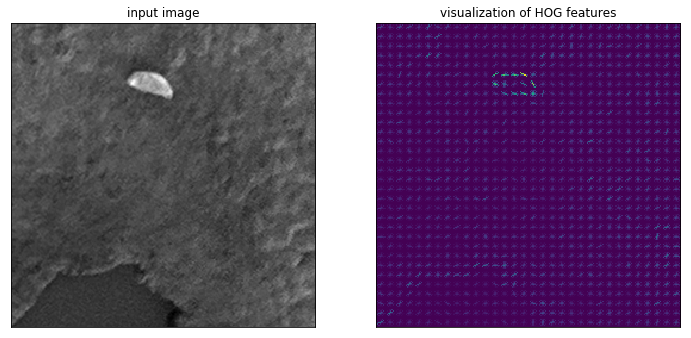

In [8]:
from skimage import data, color, feature
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def RGB2Lum(patch):
    '''Convert a rgb array to grey using standard luminence equation'''   
    return patch[:,:,0]*.2126 + patch[:,:,1]*.7152 + patch[:,:,2]*.0722

ax = np.arange(256*256*4).reshape(256,256,4)
path = '/home/julien/Desktop/NewData/StitchMICE_ORKlh16_3_1104_CP_FINAL/'+'8/130/87.png'
Im = Image.open(path)

#Image = 'some array'
Grey_patch = RGB2Lum(np.asarray(Im))
hog_vec, hog_vis = feature.hog(Grey_patch, visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(Grey_patch, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features')

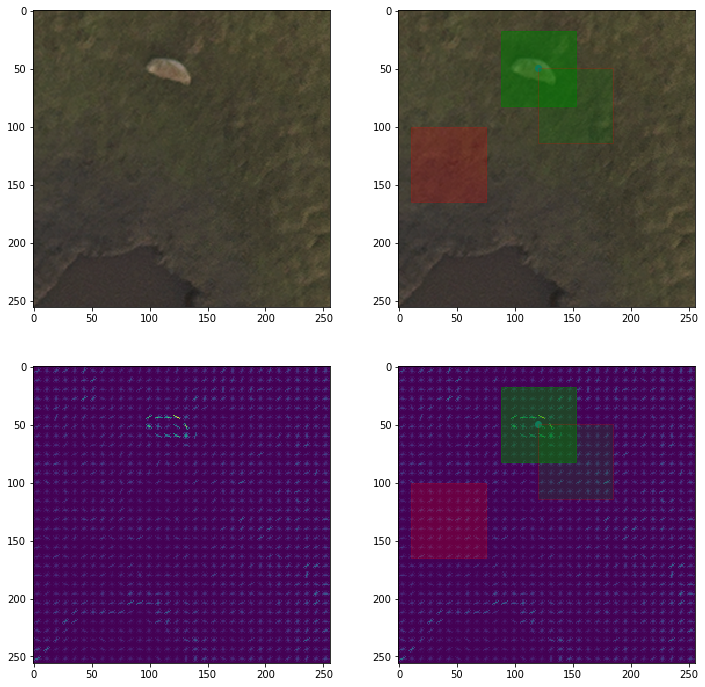

In [64]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

X,Y = 120,49
Dia = 32

fig, ax = plt.subplots(2,2, figsize=(12, 12))
img = [Im,hog_vis]
for i in range(len(img)):
    norm = ax[i,0].imshow(img[i])
    ax[i,1].imshow(img[i])
    v = ax[i,1].scatter(X,Y)
    rect = mpatches.Rectangle((X-32, Y-32),65,65,linewidth=1,edgecolor='g',facecolor='g', alpha= 0.5)
    rect2= mpatches.Rectangle((X, Y),65,65,linewidth=1,edgecolor='r',facecolor='g', alpha= 0.2)
    rect3 = mpatches.Rectangle((10, 100),65,65,linewidth=1,edgecolor='r',facecolor='r', alpha= 0.2)
    for p in [rect, rect2, rect3]:
            ax[i,1].add_patch(p)





### Weighting distribution

(0, 256)

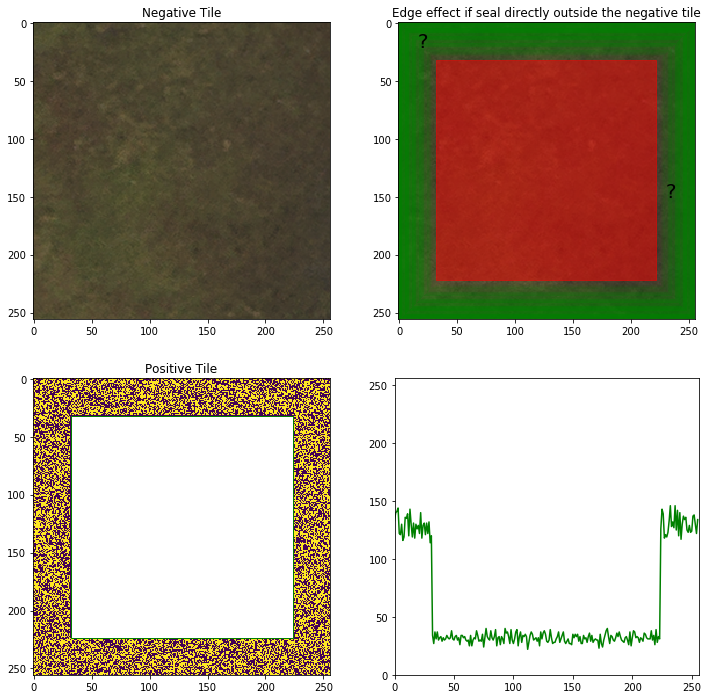

In [143]:
Path2 = '/home/julien/Desktop/NewData/StitchMICE_ORKlh16_3_1104_CP_FINAL/'+'8/130/84.png'
Im2 = Image.open(Path2)
R = 32

fig, ax = plt.subplots(2,2, figsize=(12, 12))
ax[0,0].set_title('Negative Tile')
ax[0,1].set_title('Edge effect if seal directly outside the negative tile')
ax[1,0].set_title('Positive Tile')
norm = ax[0,0].imshow(Im2)
ax[0,1].imshow(Im2)
#rect = mpatches.Rectangle((0, 0),256,256,linewidth=1,edgecolor='g',facecolor='g', alpha= 0.1)
for i in range(R):
    ax[0,1].add_patch(mpatches.Rectangle((0+i, 0+i),256-2*i,256-2*i, linewidth=3, edgecolor='g', fill = False,alpha=0.02*(32-i)))
rect2= mpatches.Rectangle((R, R),190,190,linewidth=1,edgecolor='r',facecolor='r', alpha= 0.5)
#rect3 = mpatches.Rectangle((10, 100),65,65,linewidth=1,edgecolor='r',facecolor='r', alpha= 0.2)
ax[0,1].annotate('?', xy= (R/2, 2*R/3), fontsize=20)
ax[0,1].annotate('?', xy= (230, 150), fontsize=20)
for p in [rect2]:
    ax[0,1].add_patch(p)


array = np.random.randint(2, size=(256, 256))
array[R:-R,R:-R] = 0
Xg, Yg = array.sum(axis=0), array.sum(axis=0)

ax[1,0].imshow(array)
ax[1,0].add_patch(mpatches.Rectangle((R, R),256-2*R,256-2*R, linewidth=1, edgecolor='g', facecolor ='w',alpha=1))
ax[1,1].plot(range(256), Xg, c='g')
ax[1,1].set_xlim(0,256)
ax[1,1].set_ylim(0,256)